<center><strong>A Journey Into Math For Machine Learning</strong></center>
<center><strong>机器学习之数学之旅</strong></center>
<center><strong>之 逻辑回归(三)</strong></center>

这是**逻辑回归**的第三部分, 今天的主题下面第六部分, 通过梯度下降法找到最佳的模型参数, 如果你没有看上一节课的内容, 请在github项目根目录的readme文件里寻找链接.   
**课程预览**:   
(一). 二项逻辑回归的直觉;   
(二). 逻辑回归的来历: $odds$和$probability$;      
(三). 逻辑回归的计算: $logit$函数和$sigmoid$函数及它们的特性;   
(四). 最大似然估计$(maximum \ likelihood \ estimation)$和损失函数;   
(五). 困惑度$(perplexity)$的定义;   
(六). 参数的获取: 梯度下降$(gradient \ descent)$法优化参数;      

**需要的组件**:   
numpy, scikit-learn(数据集), matplotlib(可视化), plotly(可视化)

**(六). 参数的获取: 梯度下降 (𝑔𝑟𝑎𝑑𝑖𝑒𝑛𝑡 𝑑𝑒𝑠𝑐𝑒𝑛𝑡) 法优化参数**   
1. 回顾我们在之前"逻辑回归(一,二)"中推导出的损失函数:   
$$J(\theta)=-\sum_{i}^{m} Y log(\hat{Y}) - (1-Y) log(1-\hat{Y})$$
上式中$i$是数据点序号, 一共$m$个数据点.
2. 回顾我们在之前"图解极大似然估计与3D可视化"中画出的$log \ likelihood$, 也就是我们现在损失函数的图像, 注意我们的损失函数是对原始的$log \ likelihood$取负号, 使极大似然值的最大化问题变成最小化问题.

![title](./mle_convex.png)

3. 我们看到上图, 损失函数是一个凸函数, 我们今天使用**梯度下降法**来寻找损失函数极小值, 或者说我们要求出, 当$\theta$取什么值时, 损失函数可以到达极小值. 
4. 如果你不知道什么是梯度, 我来快速讲解一下, 看下图, 假设下图的函数是一个山坡, 我们现在站在函数表面某个点, 我们从这个点向上面看, 梯度指的是这个坡最陡峭的地方到底有多陡, 梯度下降指的就是沿着最陡的路径, 不断向下进行搜寻, 直到到达函数的最低点.

![title](./gradient.png)

5. 比如说我们现在有一组参数$\theta^T=
 \left[
 \begin{matrix}
   bias & \theta_1 & \theta_2 
  \end{matrix}
  \right]$
  和损失函数$J(\theta)$, 我们想要知道这组参数$\theta$取怎样的值时, 可以让$J(\theta)$达到最小, 我们需要知道往哪个方向调节参数, 才可以让$J(\theta)$变小, 我们这时就要求出梯度来, 我们要知道在当前点, 函数往哪个方向变化最陡峭, 然后往相反的方向, 也就是下山的方向搜寻, 期望最终能够达到最低点.
6. 要求出梯度, 我们要求$J(\theta)$对于$\theta_j$的偏导数$\frac{\partial J(\theta)}{\partial \theta_j}$, 偏导数的意义是, 它描述来函数在某一点的变化率, 说白了就是陡峭程度, 在这里可以这样理解, 我们稍微调节一点点$\theta_j$, 会对$J(\theta)$有多么大的影响, 而偏导数就是这个影响的比例, 或者说山越陡峭, 走一步而上升的海拔高度就越高, 而偏导数就是你走一步上升的海拔高度和步长的比例.

**求导过程**:   
我们有损失函数$J(\theta)=-\sum_{i}^{m} Y log(\hat{Y}) - (1-Y) log(1-\hat{Y})$, 需要求$J(\theta)$对于$\theta_i$的导数$\frac{\partial J(\theta)}{\partial \theta_i}$, 注意$\hat{Y}=\frac{1}{1+e^{-\theta^T X}}$

利用$\frac{d}{dx} \log_a(f(x)) = \frac{1}{f(x)\ln a} f^\prime(x)$, 再将$\hat{Y}=\frac{1}{1+e^{-\theta^T X}}$代入$\log (\hat{Y})$:

$$\frac{\partial}{\partial \theta_j} \log (\hat{Y}) = \frac{\partial}{\partial \theta_i}\log(\frac{1}{1+e^{-\theta^T x}}) 
=\frac{\partial}{\partial \theta_j}\log(1)- \log({1+e^{-\theta^T x}})$$
$$\frac{\partial}{\partial \theta_j} \log (\hat{Y})=\frac{\partial}{\partial \theta_j} - \log({1+e^{-\theta^T x}})=-\frac{1}{1+e^{-\theta^T x}} \cdot e^{-\theta^T x} \cdot -x_j=(1-\frac{1}{1+e^{-\theta^T x}})x_j \tag{eq.1}$$

我们再来求$\frac{\partial}{\partial \theta_j} \log (1-\hat{Y})$
$$\frac{\partial}{\partial \theta_j} \log (1-\hat{Y})=
\frac{\partial}{\partial \theta_j} \log(\frac{e^{-\theta^T x}}{1+e^{-\theta^T x}})=
\frac{\partial}{\partial \theta_j} -\theta^T x- \log (1+e^{-\theta^T x})$$
将$(eq.1)$代入上式求导:
$$\frac{\partial}{\partial \theta_j} \log (1-\hat{Y})=-x_j+x_j(1-\frac{1}{1+e^{-\theta^T x}})
= -\frac{1}{1+e^{-\theta^T x}}x_j \tag{eq.2}$$

我们将$(eq.1)$和$(eq.2)$求得的$\frac{\partial}{\partial \theta_j} \log (\hat{Y}) , \quad\frac{\partial}{\partial \theta_j} \log (1-\hat{Y})$代入$\frac{\partial}{\partial \theta_j}J(\theta)$, 注意$i$是数据点的序号$j$是特征的数量:
$$X= \left[
 \begin{matrix}
   x_{i=1,j=1}, \ x_{i=2,j=1}, \ ... \ ,  x_{m,j=1}\\ 
   x_{i=1,j=2}, \ x_{i=2,j=2}, \ ... \ , x_{m,j=2}\\ 
   x_{i=1,j=3}, \ x_{i=2,j=3}, \ ... \ ,  x_{m,j=3}\\ 
  \end{matrix}
  \right]$$
$$\frac{\partial}{\partial \theta_j}J(\theta)=
-\sum_{i}^{m}y_i x_{ij}(1-\frac{1}{1+e^{-\theta^T x_i}})-(1-y_i)x_{ij}\frac{1}{1+e^{-\theta^T x_i}}$$
展开, 整理得到, 注意$\hat{y}=\frac{1}{1+e^{-\theta^T x}}$:
$$\frac{\partial}{\partial \theta_j}J(\theta)=
\sum_{i}^{m}(\frac{1}{1+e^{-\theta^T x_i}}-y_i)x_{ij}
=\sum_{i}^{m}(\hat{y}_i-y_i)x_{ij}\tag{eq.3}$$

我们还记得之前$\theta$和$X$的向量表示形式
$\theta^T=
 \left[
 \begin{matrix}
   bias & \theta_1 & \theta_2 
  \end{matrix}
  \right]
\quad
X=
 \left[
 \begin{matrix}
   1  \\
   x_1  \\
   x_2 
  \end{matrix}
  \right]$   
我们发现$\theta$里$bias$的对应着$X$里面的$1$, 由此可得出:
$$\frac{\partial}{\partial \ bias}J(\theta)=
\sum_{i}^{m}(\hat{y}_i-y_i)\tag{eq.4}$$

**搜寻下山过程**   
我们现在已经得到了$\theta_j$和$bias$的梯度, 我们用这个梯度来更新我们的参数, 我们定义一个学习率$\eta$, 防止下山的时候跑的太快而跑过头, 一般学习率的取值都比较小, 在我们下面的实验中, 取学习率为$0.01$, 然后重复下面步骤, 直到收敛:
$$\theta_j \gets \theta_j - \eta \frac{\partial}{\partial \theta_j}J(\theta)\tag{eq.5}$$
$$bias \gets bias - \eta \frac{\partial}{\partial \ bias}J(\theta)\tag{eq.6}$$

In [22]:
# 导入所需组件
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

In [23]:
X, y = make_classification(random_state=2)
# 只取两个特征值, 二维特征值方便可视化
X = X.T[:2, :]
y = np.expand_dims(y, axis=0)
print("X", X.shape)
print("y", y.shape)

X (2, 100)
y (1, 100)


In [24]:
# 形成网格, 我们之后用来画分类边界
interval = 0.2
x_min, x_max = X[0, :].min() - .5, X[0, :].max() + .5
y_min, y_max = X[1, :].min() - .5, X[1, :].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, interval),
                     np.arange(y_min, y_max, interval))

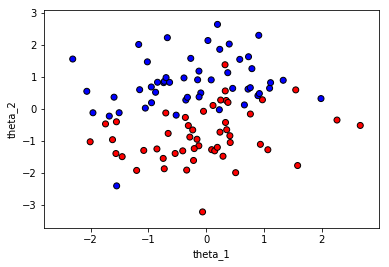

In [25]:
# 首先画一下数据点
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=cm_bright, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("theta_1")
plt.ylabel("theta_2")
plt.show()

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
# 初始化theta为全0
theta = np.zeros([2, 1])
# 初始化偏置为0
bias = np.zeros([1])

In [28]:
# 进行正向计算并求出损失
def forward(X, theta, bias):
    z = np.dot(theta.T, X) + bias
    y_hat = sigmoid(z)
    return y_hat
def compute_loss(y, y_hat):
    e = 1e-8
    return - y * np.log(y_hat + e) - (1 - y) * np.log(1 - y_hat + e)

In [29]:
# 梯度下降, 参见(eq.3), (eq.4), (eq.5), (eq.6)
def backward(X, y, y_hat, theta):
    m = X.shape[-1]
    # 求theta的梯度
    delta_theta = np.dot(X, (y_hat-y).T) / m #(eq.3)(eq.5)
    # 求bias的梯度
    delta_bias = np.mean(y_hat-y) #(eq.4)(eq.6)
    return delta_theta, delta_bias

In [30]:
for i in range(1000):
    # 正向
    y_hat = forward(X, theta, bias)
    # 计算损失
    loss = np.mean(compute_loss(y, y_hat))
    if i%100 == 0:
        print("step:",i,"loss:",loss)
    # 梯度下降
    delta_theta, delta_bias = backward(X, y, y_hat, theta)
    # 更新参数
    theta -= 0.1 * delta_theta
    bias -= 0.1 * delta_bias

step: 0 loss: 0.6931471605599454
step: 100 loss: 0.3557057567504517
step: 200 loss: 0.3290795009103417
step: 300 loss: 0.32109595696394033
step: 400 loss: 0.3178361588605987
step: 500 loss: 0.31630155433263485
step: 600 loss: 0.3155182426553739
step: 700 loss: 0.31509745716547444
step: 800 loss: 0.31486351407774793
step: 900 loss: 0.31473027929320696


In [31]:
# 画等高线图
data = np.c_[xx.ravel(), yy.ravel()].T
# 计算出区域内每一个点的模型预测值
Z = forward(data, theta, bias)
Z = Z.reshape(xx.shape)

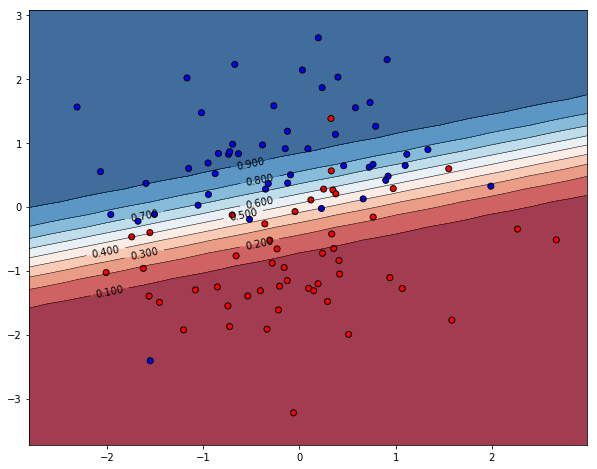

In [32]:
# 定义画布大小
plt.figure(figsize=(10,8))
# 画等高线
plt.contourf(xx, yy, Z, 10, cmap=plt.cm.RdBu, alpha=.8)
# 画轮廓
contour = plt.contour(xx, yy, Z, 10, colors="k", linewidths=.5)
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=cm_bright, edgecolors='k')
# 标出等高线对应的数值
plt.clabel(contour, inline=True, fontsize=10)
plt.show()